# Missing Values (Eksik Değerler)

Eksik Değerler: Gözlemlerde eksiklik olması durumunu ifade etmektedir.


Eksik Veri problemi nasıl çözülür ?

- Silme
- Değer Atama Yöntemleri (ortalama , medyan gibi değerleri atamak)
- Tahmine Dayalı Yöntemler 



Eksik veri ile çalısırken göz önünde bulundurulması gereken önemli konulardan birisi : Eksik verinin rassalığıdır.Eksikliğin rastgele ortaya cıkıp cıkmadıgı durumudur.


Eğer eksiklikler rastgele ortaya cıktıysa rahatız silebiliriz , rastgele ortaya cıkmadıysa rahat değiliz. Bu eksikliğin neyden ötürü cıktıgını tespit etmemiz gerekir. Diğer değişkenler ile bağımlılıgını bulup çözmekle uğraşmalıyız.

# Eksik Değerlerin Yakalanması

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler , RobustScaler

In [3]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data

In [4]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# eksik gozlem var mı yok mu sorgusu
df.isnull().values.any()

True

In [6]:
# degiskenlerdeki eksik deger sayisi
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# degiskenlerdeki tam deger sayisi
df.notnull().sum() # notnull : dolu mu?

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
# veri setindeki toplam eksik deger sayisi
df.isnull().sum().sum()

866

In [9]:
# en az bir tane eksik degere sahip olan gözlem birimleri
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
# tam olan gözlem birimleri
df[df.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:

# Azalan şekilde sıralamak
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
# Eksikliğin veri seti içindeki oranını bulalım dersek; 
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [13]:
# Sadece eksik değere sahip değişkenlerin isimlerini seçebiliriz.
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['Age', 'Cabin', 'Embarked']

In [14]:
# Fonksiyonlaştırırsak
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


In [15]:
missing_values_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [16]:
missing_values_table(df, True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

# Eksik Değer Problemini Çözme

Eksikliklerden kurtulmak istiyoruz. Eğer ağaca dayalı yöntemler  kullanılıyorsa bu durumda eksik değerler tıpki aykırı değerler gibi etkisi gözardı edilebilir durumlardır. 

Ağaç yöntemleri, doğrusal yöntemlerde yada optimizasyona dayalı yöntemlerde oldugu gibi değilde daha esnek ve dallara ayırmalı bir şekilde çalısıyor oldugundan dolayı bu noktadaki aykırılıklar ve eksikliklerin etkisi neredeyse yoka yakındır. Göz ardı edilebilir.

Bir istisna : Eğer regresyon analizi yapılıyorsa , bağımlı değişkende sayısal ise bu durumda aykırılık var ise sonuca gitme süresi uzuyabilir.


In [20]:
# Eksik değerlerimize bakalım
missing_values_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


# # Çözüm 1: Hızlıca silmek

In [25]:
df.dropna().shape

(183, 12)

In [19]:
df.dropna().shape  

(183, 12)

# Çözüm 2: Basit Atama Yöntemleri ile Doldurmak

In [28]:
df["Age"].fillna(df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [29]:
df["Age"].fillna(df["Age"].mean()).isnull().sum()

0

In [30]:
df["Age"].fillna(df["Age"].median()).isnull().sum()
df["Age"].fillna(0).isnull().sum() #sabit bir değer verebiliriz.

0

Sadece yaş değişkeni için evet eksik değerleri doldurduk. Peki benim elimde birden cok eksik değere sahip değişken varsa ne yapacağım ? Aşağıdaki kod genel baktıgımız için hata verir. Kategorik değişkenin nasıl ortalamasına bakacaksın diyerek bize hata verir

 df.apply(lambda x: x.fillna(x.mean()), axis=0) # axis = 0 dememizin sebebi; 
satırlara göre gitmesini istiyorum. Satırlara göre gittiğinde sütun bazında aslında konuya
bakıyoruz. Amacım aşağıya doğru bütün satırlara bakmak bu nedenle axis =0 diyoruz

Öyle bir işlem yapalım ki sadece sayısal değişkenleri mean ile doldur, kategorik değişkenler normal kalsın

In [32]:
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
# bu durumu dff olarak kaydedelim ve üzerinden ilerleyelim

In [36]:
# tekrar bakacak olursak;
dff.isnull().sum().sort_values(ascending=False)
# sayısal değişkenlerdeki eksik değerleri doldurduk(yaş değişkenindeki eksiklikler)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Sayısal değişkenlerdeki eksiklikleri doldurduk . Peki kategorik değişkenleri nasıl dolduracağız?
Kategorik değişkenlerdeki eksikliklerin gidermenin yolu modunu almaktır!!

In [39]:
df["Embarked"].mode()[0]

'S'

In [40]:
# # KAtegorik değişkenler için eksik değerleri doldurmak istersek modunu almalıyız
df["Embarked"].fillna(df["Embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [41]:
df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()

0

In [58]:
df["Embarked"].fillna("missing")  # boş değerleri missing ismi ile doldur diyebiliriz

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [42]:
# otomatik olarak eksik kategorik değişkenleri doldurmak
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Embarked kategorik değişkenindeki eksiklikler doldu.

# Kategorik Değişken Kırılımında Değer Atama

Veri setinde var olan bazı kategorik değişkenleri kırılım olarak ele almak ve bu kırılımlar neticisindeki değerleri ilgili değerlere atamak.

Örnek verirsek; kadınların yaş ortalaması ve erkeklerin yaş ortalaması farklı ama biz yukardaki örnekte tek bir ortalamaya göre atama işlemi yaptık. Bunu kırılım vererek kadınların ortalaması için ayrı , erkeklerin yaş ortalamsına göre ayrı değerlendirerek eksik değer atama işlemi yapabiliriz.

Cinsiyete göre yaş ortalamaları aşağıdaki gibidir

In [46]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Biz yukarıdaki örnekte direk yaş değişkeninin ortalamasına göre yaptık yani 29 dedik, fakat bu atama işlemini kadın-erkek kırılımında gerçekleştirebiliriz

In [48]:
df["Age"].mean()

29.69911764705882

Cinsiyete göre verisetini grupla. Sonra Age değişkenini al . Bu yaş değişkeninin ortalamasını aynı group by kırılımında gerekli yere yaz

In [50]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

Loc yöntemi ile yapacak olursak;

In [53]:
df.groupby("Sex")["Age"].mean()["female"]

27.915708812260537

In [54]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

In [56]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#  Çözüm 3: Tahmine Dayalı Atama ile Doldurma

Bir makine öğrenmesi yöntemi ile tahmine dayalı bir şekilde modelleme işlemi gerçekleştireceğiz.
Eksikliğe sahip değişkeni bağımlı değişken, diğer degişkenleri bağımsız değişken olarak kabul ederek bir modelleme işlemi gerçekleştireceğiz.



Modelleme işlemine göre eksik değerlere sahip noktaları tahmin etmeye çalısıcaz

Birkaç kritik konumuz olacak;

1- kategorik değişkenleri One hot encoding e sokmamız lazım.
2- knn uzaklık temalı bir algoritma oldugu için değişkenleri standartlaştırmamız lazım  


In [78]:
df = load()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Diğer bölümde kullandıgımız grab_col_names fonksiyonunu yani veriseti üzerindeki kategorik, sayısal ve kardinal değişkenleri bulan fonksiyonu çalıştıralım

In [79]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations(Gözlem): {dataframe.shape[0]}")
    print(f"Variables(Değişken): {dataframe.shape[1]}")
    print(f'cat_cols(kategorik Değişken): {len(cat_cols)}')
    print(f'num_cols(Numerik değişken): {len(num_cols)}')
    print(f'cat_but_car(Kardinal değişken): {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [80]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations(Gözlem): 891
Variables(Değişken): 12
cat_cols(kategorik Değişken): 6
num_cols(Numerik değişken): 3
cat_but_car(Kardinal değişken): 3
num_but_cat: 4


In [81]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [84]:
num_cols  # passenger ıd istemiyoruz

['PassengerId', 'Age', 'Fare']

In [83]:
cat_but_car

['Name', 'Ticket', 'Cabin']

In [86]:
num_cols = [col for col in num_cols if col not in "PassengerId"]
# passenger ıd cıkarıyoruz

one hot encoding ve label encoding işlemini aynı anda yapabilmek için get_dummies metodunu kullanıyoruz


Kategorik değişkenleri 2 sınıflı yada daha fazla sınıfa sahip kategorik değişkenleri  numeric bir sekilde ifade ediyoruz

In [90]:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,1,0,1
1,1,1,1,0,38.0,71.2833,0,0,0
2,1,3,0,0,26.0,7.9250,0,0,1
3,1,1,1,0,35.0,53.1000,0,0,1
4,0,3,0,0,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,27.0,13.0000,1,0,1
887,1,1,0,0,19.0,30.0000,0,0,1
888,0,3,1,2,NaN,23.4500,0,0,1
889,1,1,0,0,26.0,30.0000,1,0,0


In [91]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.0,7.2500,1,0,1
1,1,1,1,0,38.0,71.2833,0,0,0
2,1,3,0,0,26.0,7.9250,0,0,1
3,1,1,1,0,35.0,53.1000,0,0,1
4,0,3,0,0,35.0,8.0500,1,0,1


In [94]:
# değişkenlerin standartlaştırılması

In [92]:
scaler = MinMaxScaler()

In [95]:
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.000000,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.000000,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.000000,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.000000,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.000000,0.434531,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.000,0.000000,0.334004,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.000,0.000000,0.233476,0.058556,0.0,0.0,1.0
888,0.0,1.0,0.125,0.333333,NaN,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.000,0.000000,0.321438,0.058556,1.0,0.0,0.0


In [96]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


In [75]:
# knn'in uygulanması.

In [76]:
from sklearn.impute import KNNImputer

In [97]:
imputer = KNNImputer(n_neighbors=5)

In [104]:
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)

In [99]:
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.0,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.0,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.0,0.434531,0.015713,1.0,0.0,1.0


doldurdumuz alanları görmek istiyoruz fakat değerler standartlaştırılmıs durumda bunu geri almak için inverse_transform metodunu kullanıyorum

In [106]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.125,0.000000,0.271174,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.125,0.000000,0.472229,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.000,0.000000,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.125,0.000000,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.000,0.000000,0.434531,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.000,0.000000,0.334004,0.025374,1.0,0.0,1.0
887,1.0,0.0,0.000,0.000000,0.233476,0.058556,0.0,0.0,1.0
888,0.0,1.0,0.125,0.333333,0.273687,0.045771,0.0,0.0,1.0
889,1.0,0.0,0.000,0.000000,0.321438,0.058556,1.0,0.0,0.0


age değişkenin eski degeri neydi biz ne atadık ? bunları görelim

In [112]:
df["age_imputed_knn"] = dff[["Age"]]
# makine öğrenmesi tekniği ile doldurmus oldugumuz yeni yaş değerlerini eski dataframe içerisine kolon olarak ekliyorum 

In [113]:
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]]

,Age,age_imputed_knn
5,NaN,0.595376
17,NaN,0.467203
19,NaN,0.148027
26,NaN,0.406886
28,NaN,0.215883
...,...,...
859,NaN,0.318924
863,NaN,0.105303
868,NaN,0.308872
878,NaN,0.301332


In [111]:
df.loc[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.595376
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0.467203
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0.148027
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0.406886
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0.215883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0.318924
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0.105303
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0.308872
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0.301332


# Recap

In [116]:
df = load()

In [117]:
# missing table
missing_values_table(df)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [118]:
# sayısal değişkenleri direk median ile oldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [120]:
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [122]:
# Tahmine Dayalı Atama ile Doldurma

# Eksik verinin yapısını incelemek

Gelişmiş Analizler


İleri seviyeden oluşabilecek ihtiyaclar için bazı yaklaşımlar inceleyeceğiz

- Eksik verinin yapısını inceleyeceğiz
- Bağımlılık olup olmadıgını inceleyeceğiz
- Eksik değerler ve bağımlı değişkenler arasındaki durumu inceleme fonksiyonunu inceleyeceğiz



# Eksik Veri Yapısının İncelenmesi

<AxesSubplot:>

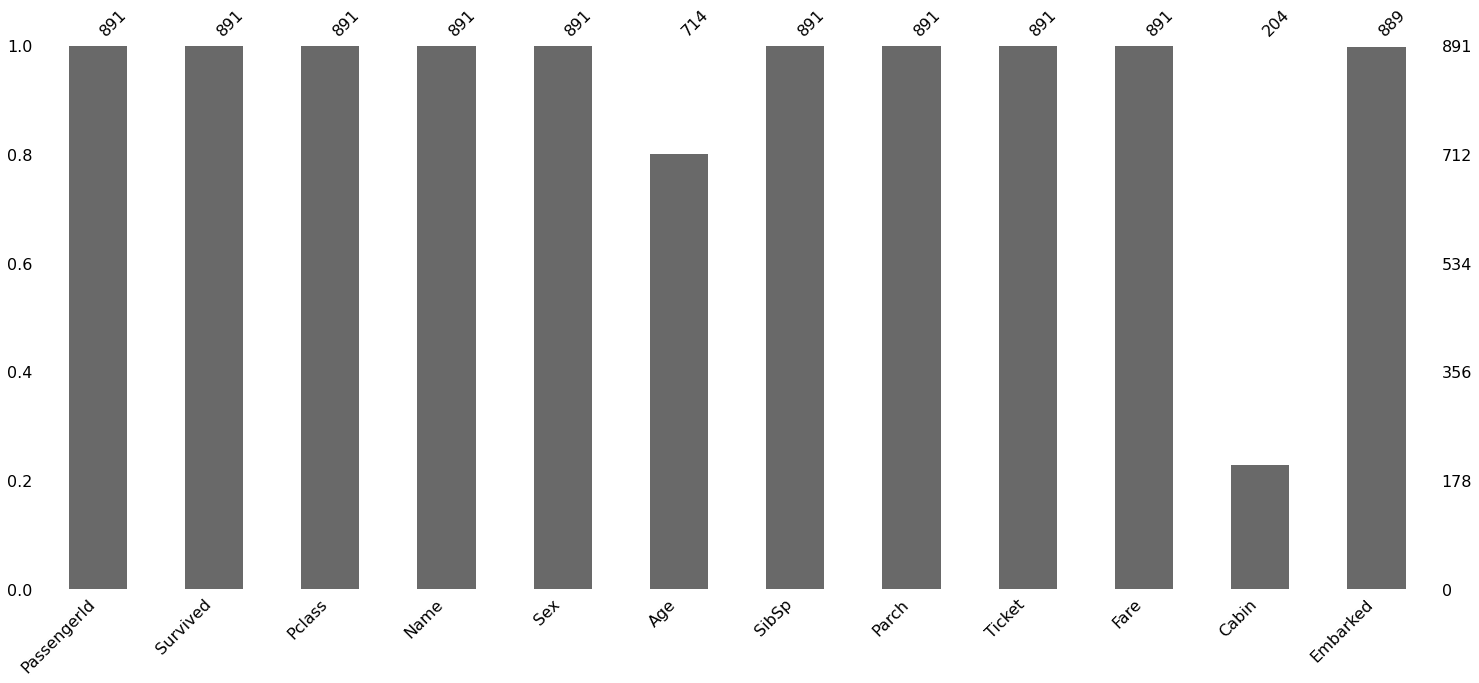

In [123]:
msno.bar(df)
# bar : verisetindeki tam olan gözlemlerin sayısını vermektedir

<AxesSubplot:>

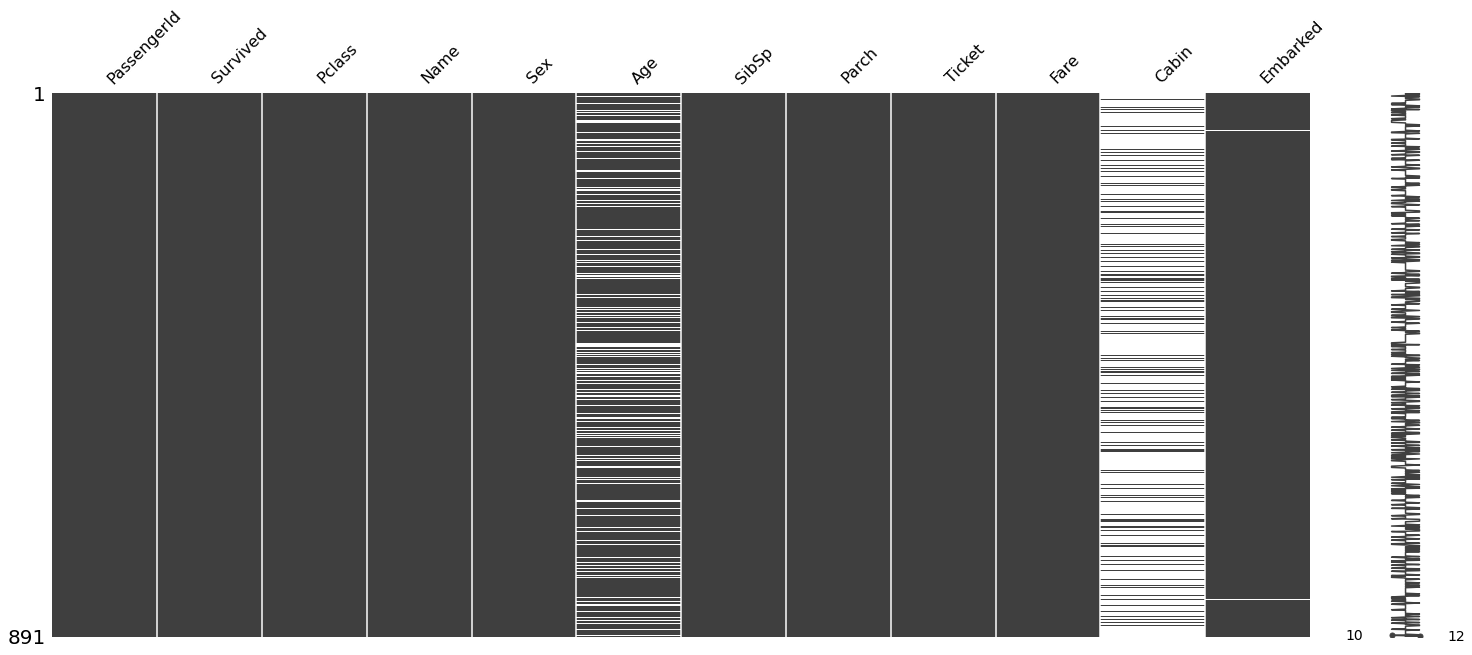

In [137]:
msno.matrix(df)
# matrix: Değişkenlerdeki eksikliklerin birlikte cıkıp cıkmadıgı bilgisini verir

<AxesSubplot:>

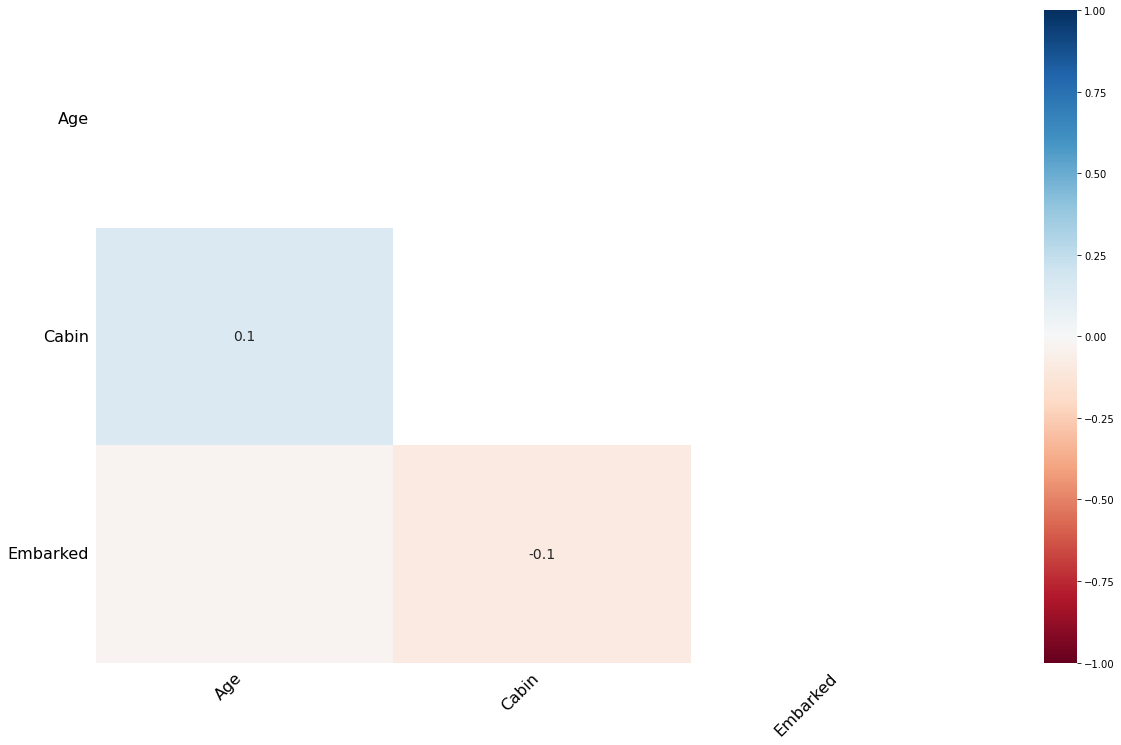

In [140]:
msno.heatmap(df)
# heatmap : ısı haritası , eksiklikler birlikte mi cıkıyor bağımlıgınını anlayabilmek için kullanırız
# pozitif yönde korelasyon değişkenlerdeki eksikliklerin birlikte ortaya cıktıgı düşünülür . Yani birisinde eksiklik varsa diğerinde de vardır

Bizim verisetimizde değişkenlerin birlikte ortaya cıkmadıgı gözüküyor

# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi

Amacım, bir veri setimiz var. Çeşitli değişkenlerimiz var . Bu değişkenlerde eksiklikler var .
Bu eksikliklerin acaba bu bağımlı değişken tarafında bir karsılıgı var mı? acaba özel bir yapı mıdır ? gibi soruların yanıtını değerlendireceğiz

In [143]:
missing_values_table(df, True)  # true diyince indexler de geliyordu

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

In [145]:
na_cols = missing_values_table(df, True)  #na_cols diyerek kaydediyorum

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [148]:
# target: bağımlı değişken
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy() # girilen dataframe 'in kopyasını olustur

    for col in na_columns:  # eksikdeğerlere sahip değişkenlerde gez, yedek dataframe içerisinde bu değişkenleri yeni isimlendirme ile olustur.Yeni değişken şu sekilde olacak: na gördüğün yere 1 yoksa 0 olarak atama işlemi yap
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns  # bu değişkenlerin isimlerini al 

    for col in na_flags:  # bu na bulunduran kolonlarda gez
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")



In [149]:
missing_vs_target(df, "Survived", na_cols)
# 3 tane değişkenim (eksik değişkenlerim) bağımlı değişken olan Survived değişkeni ortalaması açısından değerlendirilmesi 

             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




# Recap

In [130]:
df = load()

In [131]:
na_cols = missing_values_table(df, True) # eksik değerleri getirdiğimiz bir fonksiyon tanımladık

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


In [132]:
# sayısal değişkenleri direk median ile oldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [133]:
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [150]:
# Tahmine Dayalı Atama ile Doldurma
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2


